# Lecture 3 - Linear Regression with Polynomial Features

Last class, we introduced different types of learning, in particular, supervised learning and unsupervised learning.

We have also described a typical workflow of a supervised learning algorithm.

## Supervised Learning

**Supervised Learning:** Learning a mapping from input data to desired output values given labeled training data.

The typical workflow of a Supervised Learning algorithm is as follows:

**Training Stage**
1. Collect labeled training data - often the most time-consuming and expensive task.
2. Extract features - extract *useful* features from the input (or observational) data such that they have discriminatory information in successfully mapping the desired output. 
3. Select a model - relationship between input data and desired output.
4. Fit the model - change model parameters (*Learning Algorithm*) in order to meet some *Objective Function*.

**Testing Stage**
1. Given unlabeled test data
2. Extract (the same) features
3. Run the unabeled data through the trained model

### Block-diagram for Supervised Learning

<div><img src="figures/SupervisedLearning.png", width="800"><!div>

We mentioned some of the challenges of supervised learning:

* How do you know if you have *representative* training data?
* How do you know if you extracted *good* features?
* How do you know if you selected the *right* model?
* How do you know if you trained the model *well*?

As so, a lot of Machine Learning scientists' work is to select:

1. which **features** to collect or generate
2. which **mapper** function to use
3. which **objective function** (or **cost function**) to use
4. which **learning algorithm** to use

After these choices are made, the machine will make use of **feedback** loop and update itself as it is given data.

So, it is *extremelly* important that we have enough data (in order to have accurate representations) but also *good* data. And this is one of the most time consuming and, arguably, the most important step in Machine Learning.

## Polynomial Regression

<div class="alert alert-info">
    
**Polynomial Regression** is a type of linear regression that uses a special set of *features* - polynomial features.
</div>

<div class="alert alert-success">
    <b>Step 1 - Input Space</b> 

Suppose we are given a training set comprising of $N$ observations of $\mathbf{x}$, $\mathbf{x} = \left[x_1, x_2, \ldots, x_N \right]^T$, and its corresponding desired outputs $\mathbf{t} = \left[t_1, t_2, \ldots, t_N\right]^T$, where sample $x_i$ has the desired label $t_i$.

So, we want to learn the *true* function mapping $f$ such that $\mathbf{t}  = f(\mathbf{x}, \mathbf{w})$, where $\mathbf{w}$ are *unknown* parameters of the model.
</div>

* We generally organize data into *vectors* and *matrices*. Not only is it a common way to organize the data, but it allows us to easily apply linear algebraic operations during analysis. It also makes it much simpler when it comes to code implementation!
    * In engineering textbooks and in this course's notation, **vectors** are defined as *column vectors*. This is why we write $\mathbf{x} = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N\end{array} \right] = \left[x_1, x_2, \ldots, x_N \right]^T$.

* Note that both the training data and desired outputs can be noisy.

<div class="alert alert-success">
    <b>Step 2 - Feature Space</b> 

For the polynomial regression problem, let's consider *polynomial features* for each data point $x_i$. Let's say we can find these features using a **basis function**, $\phi(\mathbf{x})$. In the *polynomial regression* example, let's consider $\phi(x_i) = \left[ x_{i}^{0}, x_{i}^{1}, x_{i}^{2}, \dots, x_{i}^{M}\right]^T$, where $x_i^M$ is the $M^{th}$-power of $x_i$.
</div>

* These are particularly called **polynomial features** but other features can be extracted.

* For all data observations $\{x_i\}_{i=1}^N$ and using the feature space defined as $\phi(x_i) = \left[x_{i}^{0}, x_{i}^{1}, x_{i}^{2}, \dots, x_{i}^{M}\right]^T$, we can write the input data in a *matrix* form as:

$$\mathbf{X} =\left[\begin{array}{c} \phi(x_1)^T \\ \phi(x_2)^T \\ \vdots \\ \phi(x_N)^T \end{array}\right]  = \left[\begin{array}{ccccc}
1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{M}\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{M}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{M}
\end{array}\right] \in \mathbb{R}^{N\times (M+1)}$$

where each row is a feature representation of a data point $x_i$.

<div class="alert alert-info">
    <b>Feature Space</b> 

The set of features drawn by the transformation 

\begin{align}
\phi: \mathbb{R}^D & \rightarrow \mathbb{R}^M \\
\mathbf{x} & \rightarrow \left[x_{i}^{0}, x_{i}^{1}, x_{i}^{2}, \dots, x_{i}^{M}\right]^T
\end{align}
is often called the **feature space**.
When we write a linear regression with respect to a set of basis functions, the regression model is linear in the *feature space*.

$M$ is dimensionality of the feature space and is often called the *model order*.
</div>

* Now, we want to find the mapping from the feature input data $\mathbf{X}$ to the desired output values $\mathbf{t}$.

Suppose the data actually comes from some **unknown hidden function**, that takes in the data points $\mathbf{x}$ with some parameters $\mathbf{w}$ and produces the desired values $\mathbf{t}$, i.e. $\mathbf{t} = f(\mathbf{x},\mathbf{w})$.
* We do not know anything about the function $f$. If we knew the hidden function, we would not need to learn the *mapping* - we would already know it. However, since we do not know the true underlying function, we need to do our best to estimate from the examples of input-output pairs that we have.

<div class="alert alert-success">
    <b>Step 3 - Model Selection or Mapping</b> 

Let's assume that the desired output values are a *linear combination* of the feature input space, i.e., a **linear regression model** of **polynomial features**

$$t \sim f(x,\mathbf{w}) = w_0x^0 + w_1x^1 + w_2x^2+\cdots+w_Mx^M = \sum_{j=0}^M w_jx^j = \mathbf{X}\mathbf{w}$$
</div>

* This means that for every paired training data point $\{x_i, t_i\}_{i=1}^N$, we can model the output value as 

$$t_i \sim f(x_i,\mathbf{w}) = w_0x_i^0 + w_1x_i^1 + w_2x_i^2+\cdots+w_Mx_i^M $$

* Although the polynomial function $f(x,\mathbf{w})$ is a nonlinear function of $x$, it is a linear function of the coefficients $\mathbf{w}$. Functions, such as the polynomial, which are linear in the unknown parameters have important properties and are called *linear models*.


The values of the coefficients $\mathbf{w}$ will be determined by *fitting* the polynomial to the training data. 

This can be done by minimizing an **error function** (also defined as **cost function**, **objective function**, or **loss function**) that measures the *misfit* between the function $f(x,\mathbf{w})$, for any given value of $\mathbf{w}$, and the training set data points $\{x_i,t_i\}_{i=1}^N$.

* What is the model's *objective* or goal?

<div><img src="figures/LeastSquares.png", width="300"><!div>

One simple choice for fitting the model is to consider the error function given by the sum of the squares of the errors between the predictions $f(x_i,\mathbf{w})$ for each data point $x_i$ and the corresponding target values $t_i$, so that we minimize

$$J(\mathbf{w}) = \frac{1}{2} \sum_{n=1}^N \left(f(x_n,\mathbf{w}) - t_n\right)^2 = \frac{1}{2}\left\Vert f(\mathbf{x},\mathbf{w}) - \mathbf{t} \right\Vert^2_2$$

* This error function is minimizing the (Euclidean) *distance* of every point to the curve.

* **What other/s objective function can we use?**

* We can write the error function compactly in matrix/vector form:
\begin{align*}
J(\mathbf{w}) &= \frac{1}{2}\left\Vert f(\mathbf{x},\mathbf{w}) - \mathbf{t} \right\Vert^2_2 \\
&= \frac{1}{2} \left\Vert \mathbf{X}\mathbf{w} - \mathbf{t}\right\Vert^2_2\\
&= \frac{1}{2} \left(\mathbf{X}\mathbf{w} - \mathbf{t}\right)^T \left(\mathbf{X}\mathbf{w} - \mathbf{t}\right)\\
\text{where: } & \mathbf{X} = \left[\begin{array}{ccccc}
1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{M}\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{M}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{M}
\end{array}\right], \mathbf{w} =  \left[\begin{array}{c}
w_{0}\\
w_{1}\\
\vdots\\
w_{M}
\end{array}\right], \text{and }  \mathbf{t} = \left[\begin{array}{c}
t_{1}\\
t_{2}\\
\vdots\\
t_{N}
\end{array}\right]
\end{align*}

<div class="alert alert-success">
    <b>Step 4 - Fitting the Model or Learning Algorithm</b> 

Also referred as training the model.

We *fit* the polynomial function model such that the *objective function* $J(\mathbf{w})$ is minimized, i.e. we *optimize* the following error function

\begin{align}
J(\mathbf{w}) &= \frac{1}{2} \left(\mathbf{X}\mathbf{w} - \mathbf{t}\right)^T \left(\mathbf{X}\mathbf{w} - \mathbf{t}\right) \\
&= \frac{1}{2} \left\Vert \mathbf{X}\mathbf{w} - \mathbf{t} \right\Vert_2^2
\end{align}

* This function is called the **least squares error** objective function.

The learning algorithm function is then:
$$\arg_{\mathbf{w}}\min J(\mathbf{w})$$ 
</div>

* We *optimize* the error function $J(\mathbf{w})$ in order to find the *optimal* set of parameter $\mathbf{w}^*$ that minimize the objective function.

* To do that, we **take the derivative of $J(\mathbf{w})$ with respect to the parameters $\mathbf{w}$**.

* How do you take the derivative of a *scalar*, such as $J(\mathbf{w})$, with respect to a vector, such as $\mathbf{w}$?

We can use matrix calculus directly to compute that derivative, let's instead take a look at other ways of finding *a* solution using Linear Algebra tools:

### Review of Linear Vector-valued Functions and Least Squares Solution

Consider the linear vector function defined as:

\begin{align}
\mathbf{f}: \mathbb{R}^{M+1} &\longrightarrow \mathbb{R}^N \\
\mathbf{w} &\longmapsto \mathbf{X}\mathbf{w}
\end{align}

This is our **mapper** function when our model is a **Linear Regression**.

* We want to find the solution for:

$$\mathbf{X}\mathbf{w} = \mathbf{t}$$

where $\mathbf{X}$ is a *tall* matrix of polynomial features, $\mathbf{w}$ is the vector of unknown parameters, and $\mathbf{t}$ is the vector of labels.

* We **cannot** simply take the left-inverse to find $\mathbf{w}$ because the feature matrix $\mathbf{X}$ is not square.

* As we typically have a lot more samples $N$ than unknown parameters $M+1$ ($N>>M+1$), this is an over-constrained problem and so we do not have a solution. 

* We can find a solution using the Least Squares approximation, that is, find the set of coefficients $\mathbf{w}$ that minimize the squared error approximation:

$$J(\mathbf{w}) = \frac{1}{2} \left\Vert \mathbf{X}\mathbf{w} - \mathbf{t} \right\Vert_2^2$$

* By taking the derivative of $J(\mathbf{w})$ and solving for $\mathbf{w}$, the **least squares solution** is then given by:

$$\mathbf{w} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}$$

Where $\mathbf{X}^{\dagger} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}$ is the **pseudo-inverse** (or **Moore–Penrose inverse**).

## Programming Polynomial Regression

After we have decided the on the cost function and learning algorithm, what are the programmable parameters we will need to implement a Polynomial Regression model?

* Training data, and
* Model order

**How would you implement linear regression using polynomial features?**

Let's take a look at the pseudocode below:

<div><img src="figures/LinearRegressionPseudocode.png", width="600"><!div>

### Let's simulated some data

**Example:** Suppose the input training data is sampled from a noisy sine curve.

Suppose our data comes from a noisy sinusoidal: $t = \sin(2\pi x) + \epsilon$ where $\epsilon$ is a (univariate) Gaussian zero-mean random noise. 

* The input samples are $x$
* The desired values are $t + \epsilon$, but we know that $t = \sin(2\pi x)$
* Our **goal** is to find a model that fits the set of data samples $\{x_i,t_i\}_{i=1}^N$
* Also, we want our model to be able to correctly **predict** the desired value of a new data sample $x_{test}$

Let's generate data from the *true* underlying function, $t=\sin(2\pi x)$, which, in practice, we would not know.

In [1]:
import numpy as np                # numpy contains a lot of numerical and linear algebra function
import numpy.random as npr        # module of numpy that contains functions to generate random phenomena

import matplotlib.pyplot as plt   # plotting library
%matplotlib inline                
# built-in magic to make sure the plot are statically embedded in the output cells
plt.style.use('seaborn-colorblind')          # style sheet for plots

In [2]:
def NoisySinusoidalData(N, a, b, gVar):
    x = np.linspace(a,b,N)
    noise = npr.normal(0,gVar,N)
    t = np.sin(2*np.pi*x) + noise
    return x, t

This function will generate synthetic data (data points and labels). Let's run it:

In [3]:
N = 40 
Ntest = 10 
a, b = [0,1] 
gVar_train = 0.5 
gVar_test = 1 
x1, t1 = NoisySinusoidalData(N, a, b, gVar_train)
x2, t2 = NoisySinusoidalData(N, a, b, 0)
x3, t3 = NoisySinusoidalData(Ntest, a, b, gVar_test)

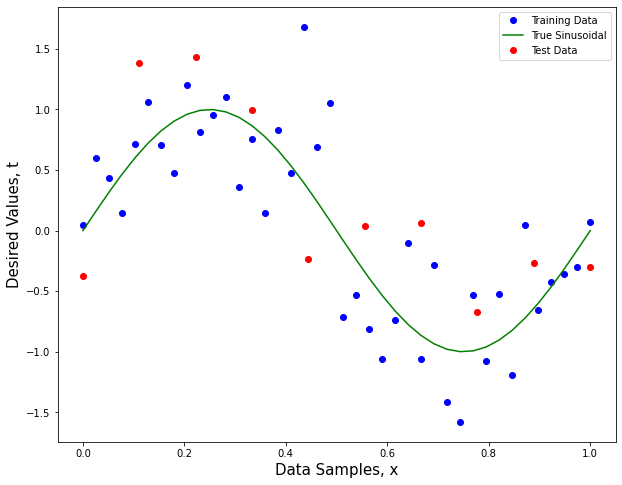

In [4]:
plt.figure(figsize=(10,8))
plt.plot(x1, t1, 'bo', label = 'Training Data')
plt.plot(x2, t2, 'g', label = 'True Sinusoidal')
plt.plot(x3, t3, 'ro', label = 'Test Data')
plt.legend()
plt.xlabel('Data Samples, x', fontsize=15)
plt.ylabel('Desired Values, t', fontsize=15);

* We want to fit the (blue) training data samples. And we want to do it such that we are *still able* to fit the (red) test data points (without labels).

Now let's fit the data using a **polynomial regression** model.

In [5]:
x1

array([0.        , 0.02564103, 0.05128205, 0.07692308, 0.1025641 ,
       0.12820513, 0.15384615, 0.17948718, 0.20512821, 0.23076923,
       0.25641026, 0.28205128, 0.30769231, 0.33333333, 0.35897436,
       0.38461538, 0.41025641, 0.43589744, 0.46153846, 0.48717949,
       0.51282051, 0.53846154, 0.56410256, 0.58974359, 0.61538462,
       0.64102564, 0.66666667, 0.69230769, 0.71794872, 0.74358974,
       0.76923077, 0.79487179, 0.82051282, 0.84615385, 0.87179487,
       0.8974359 , 0.92307692, 0.94871795, 0.97435897, 1.        ])

In [6]:
[x1[:4]**m for m in range(4)]

[array([1., 1., 1., 1.]),
 array([0.        , 0.02564103, 0.05128205, 0.07692308]),
 array([0.        , 0.00065746, 0.00262985, 0.00591716]),
 array([0.00000000e+00, 1.68580050e-05, 1.34864040e-04, 4.55166136e-04])]

In [7]:
np.array([x1[:4]**m for m in range(4)]).T

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.56410256e-02, 6.57462196e-04, 1.68580050e-05],
       [1.00000000e+00, 5.12820513e-02, 2.62984878e-03, 1.34864040e-04],
       [1.00000000e+00, 7.69230769e-02, 5.91715976e-03, 4.55166136e-04]])

In [8]:
def PolynomialRegression(x,t,M):
    X = np.array([x**m for m in range(M+1)]).T 
    w = np.linalg.inv(X.T@X)@X.T@t
    y = X@w
    error = y - t
    return w, y, error

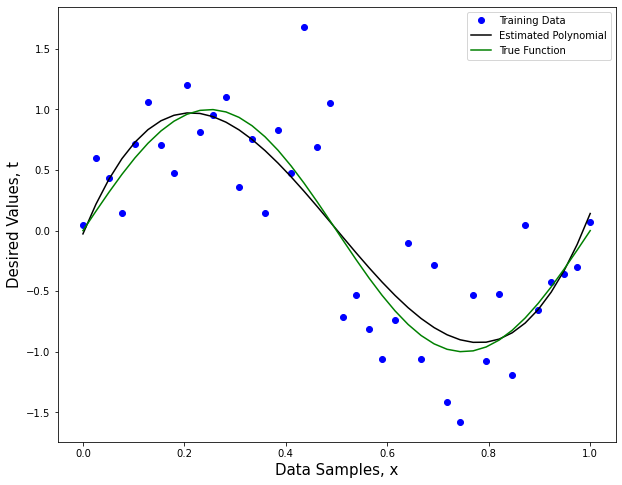

In [9]:
M = 3

w, y, error = PolynomialRegression(x1,t1,M) 

plt.figure(figsize=(10,8))
plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x1,y,'k', label = 'Estimated Polynomial')
plt.plot(x2,t2,'g', label = 'True Function')
plt.legend()
plt.xlabel('Data Samples, x', fontsize=15)
plt.ylabel('Desired Values, t', fontsize=15);

* How do the weights look like?

In [10]:
print(w)

[-2.69683714e-02  1.03305836e+01 -3.08781400e+01  2.07158215e+01]


**We trained the model!**

Now we want to used this trained model (with the parameters the machine learned, call then $\mathbf{w}^*$) and applied it to a test set without labels.

In the test data:
* Apply the same feature extraction as in training: $\mathbf{X}_{test}$, where $\mathbf{X}_{test}$ is a $K\times (M+1)$ feature matrix, and $K$ the number of test points
* Predict the output using $\mathbf{w}^*$: $$\mathbf{y}_{test} = \mathbf{X}_{test}\mathbf{w}^*$$

In [11]:
def PolynomialRegression_test(x,M,w):
    X = np.array([x**m for m in range(M+1)]).T 
    y = X@w
    return y

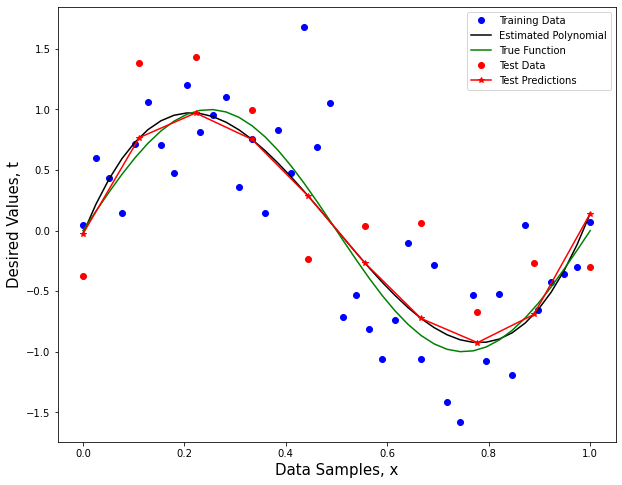

In [12]:
y_test = PolynomialRegression_test(x3, M, w)

plt.figure(figsize=(10,8))
plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x1,y,'k', label = 'Estimated Polynomial')
plt.plot(x2,t2,'g', label = 'True Function')
plt.plot(x3,t3,'ro', label = 'Test Data')
plt.plot(x3,y_test,'-r*', label = 'Test Predictions')
plt.legend()
plt.xlabel('Data Samples, x', fontsize=15)
plt.ylabel('Desired Values, t', fontsize=15);

* What happens when the test points fall outside the range of values of what the model has *learned*?

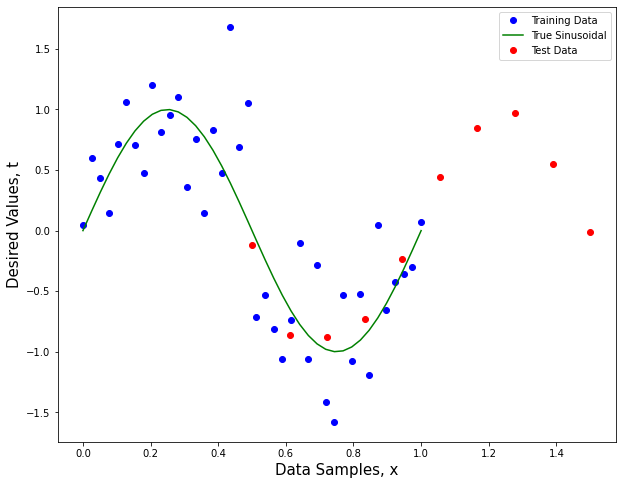

In [13]:
x4, t4 = NoisySinusoidalData(10, 0.5, 1.5, 0.1)

plt.figure(figsize=(10,8))
plt.plot(x1, t1, 'bo', label = 'Training Data')
plt.plot(x2, t2, 'g', label = 'True Sinusoidal')
plt.plot(x4, t4, 'ro', label = 'Test Data')
plt.legend()
plt.xlabel('Data Samples, x', fontsize=15)
plt.ylabel('Desired Values, t', fontsize=15);

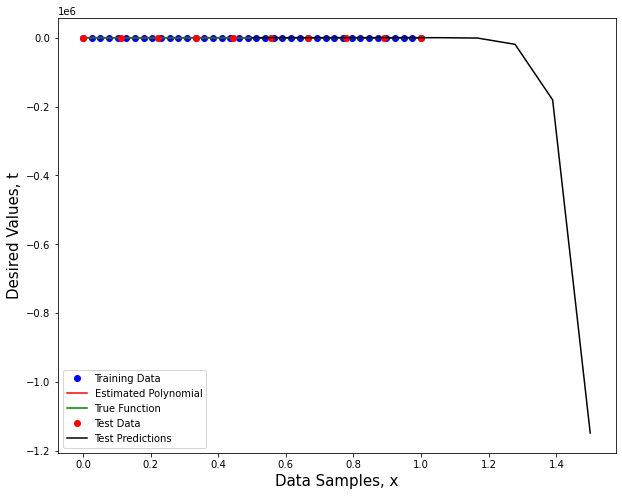

In [18]:
y_test = PolynomialRegression_test(x4, M, w)

plt.figure(figsize=(10,8))
plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x1,y,'r', label = 'Estimated Polynomial')
plt.plot(x2,t2,'g', label = 'True Function')
plt.plot(x3,t3,'ro', label = 'Test Data')
plt.plot(x4,y_test,'k', label = 'Test Predictions')
plt.legend()
plt.xlabel('Data Samples, x', fontsize=15)
plt.ylabel('Desired Values, t', fontsize=15);

## Observations

* As the model order increases, the model fit deteriorates as it will *memorize* the training data
* The model will only be able to represent the regions of the input space that are present in the training data
* This leads to poor *generalization* ability, that is, the model cannot make predictions outside what it has seen

## Assumption of Least Squares Objective Function

The least squares objective function, $J(\mathbf{w})$ assumes Gaussian noise! That is, it finds the solution for $\mathbf{w}$ such that the residual errors, $\mathbf{e}=\mathbf{t}-\mathbf{y}$, were drawn from a Gaussian distribution.

* This may not be true for (most) real world data! 

* But it is an assumption we are willing to take as it simplifies implementations and allows to fast and easy derivations.

Consider our optimization function:

\begin{align}
& \arg_{\mathbf{w}}\min J(\mathbf{w})\\
&= \arg_{\mathbf{w}} \max -J(\mathbf{w}) \\
&\propto \arg_{\mathbf{w}} \max \exp\left(-J(\mathbf{w})\right),\text{ because }\exp\text{ is a monotonically increasing function}\\
&=\arg_{\mathbf{w}} \max \exp\left(-\frac{1}{2}(\mathbf{t}-\mathbf{y})^2\right)\\
&=\arg_{\mathbf{w}} \max \exp\left(-\frac{1}{2}\mathbf{e}^2\right)\\
&\propto \mathcal{N}(0,1)
\end{align}

## Validation

* Which model order would you choose?
* How do you *validate* your results?

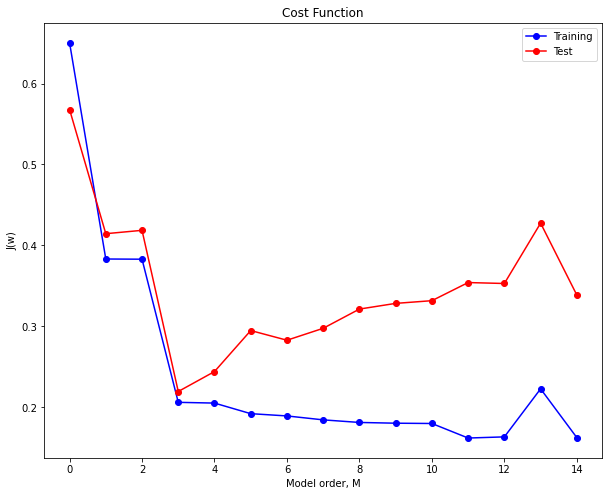

In [25]:
J_train = []
J_test = []
for M in range(15):
    w, y, error_training = PolynomialRegression(x1,t1,M)
    y_test = PolynomialRegression_test(x3, M, w)
    error_Test = y_test - t3
    J_train+=[np.sum(error_training**2)/N]
    J_test+= [np.sum(error_Test**2)/Ntest]

fig = plt.figure(figsize=(10,8))
plt.plot(J_train,'bo-', label = 'Training')
plt.plot(J_test,'ro-', label = 'Test')
plt.title('Cost Function')
plt.legend()
plt.xlabel('Model order, M')
plt.ylabel('J(w)');